In [1]:
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import scaleogram as scg 
import pywt


In [2]:
# choose default wavelet function for the entire notebook
# here we choose Complex Morlet wavelets
scg.set_default_wavelet('cmor1-1.5')


### Wavelet functions
#### Query the wavelet family

In [3]:
# list of wavelet families
pywt.families()

['haar',
 'db',
 'sym',
 'coif',
 'bior',
 'rbio',
 'dmey',
 'gaus',
 'mexh',
 'morl',
 'cgau',
 'shan',
 'fbsp',
 'cmor']

In [4]:
# list of family with a specific type
pywt.wavelist(kind='continuous')

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

In [5]:
# list of wavelet functions in a given family
family='db'
print("%s family: " % family + ', '.join(pywt.wavelist(family)))

db family: db1, db2, db3, db4, db5, db6, db7, db8, db9, db10, db11, db12, db13, db14, db15, db16, db17, db18, db19, db20, db21, db22, db23, db24, db25, db26, db27, db28, db29, db30, db31, db32, db33, db34, db35, db36, db37, db38


#### __[Wavelet object](https://pywavelets.readthedocs.io/en/latest/ref/wavelets.html#wavelet-object)__

In [6]:
# creating wavelet object for discrete wavelet
w = pywt.Wavelet('db5')
# wavelet properties
print(w)

Wavelet db5
  Family name:    Daubechies
  Short name:     db
  Filters length: 10
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


#### __[ContinuousWavelet object](https://pywavelets.readthedocs.io/en/latest/ref/wavelets.html#continuouswavelet-object)__

In [7]:
# creating wavelet object for continuous wavelet
w = pywt.ContinuousWavelet('cmor1-1.5')
print(w)

ContinuousWavelet cmor1-1.5
  Family name:    Complex Morlet wavelets
  Short name:     cmor
  Symmetry:       asymmetric
  DWT:            False
  CWT:            True
  Complex CWT:    True


#### __[Custom wavelets](https://pywavelets.readthedocs.io/en/latest/ref/wavelets.html#custom-wavelets)__

In [8]:
c = math.sqrt(2)/2
dec_lo, dec_hi, rec_lo, rec_hi = [c, c], [-c, c], [c, c], [c, -c]
filter_bank = [dec_lo, dec_hi, rec_lo, rec_hi]
myWavelet = pywt.Wavelet(name="myHaarWavelet", filter_bank=filter_bank)

### Visualizing the wavelet functions
#### Discrete wavelet and scaling functions

In [9]:
wavelet = pywt.Wavelet('db5')
[phi, psi, x] = wavelet.wavefun(level=1)

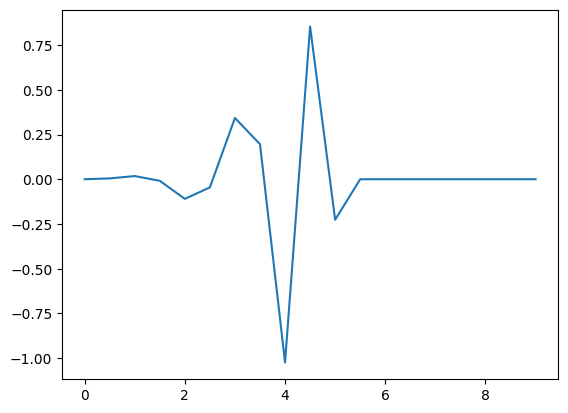

In [10]:
# plotting the wavelet function
plt.plot(x,psi)
plt.show()

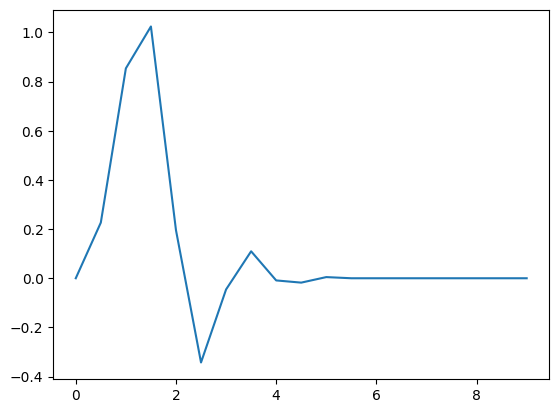

In [11]:
# plotting the scaling function
plt.plot(x,phi)
plt.show()

#### Continuous wavelet functions

In [12]:
w = pywt.ContinuousWavelet('gaus2')
[psi,x] = w.wavefun(level=10)

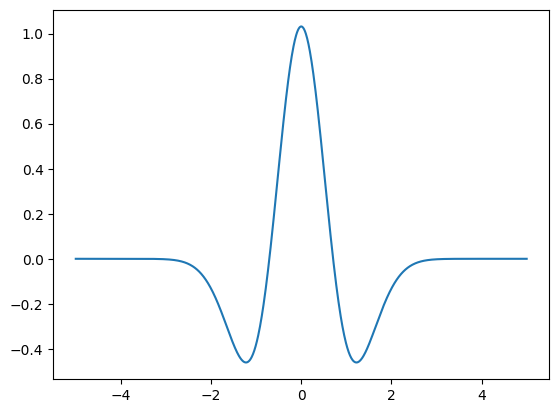

In [13]:
plt.plot(x,psi)
plt.show()

#### Plotting the frequency information

Continuous wavelet will be evaluated over the range [-8.0, 8.0]


Text(0.5, 1.0, '|FFT(filter)|$^2$')

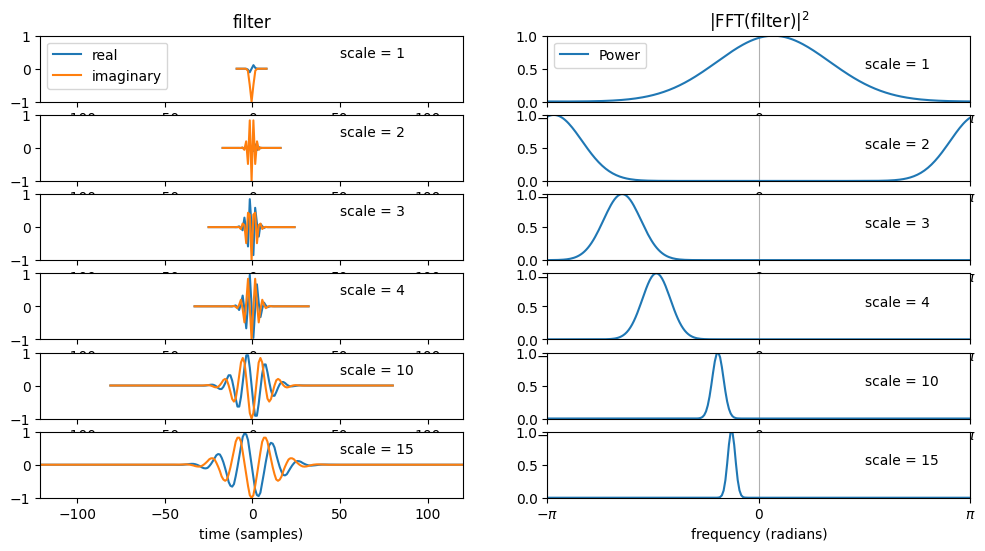

In [14]:
wav = pywt.ContinuousWavelet('cmor1.5-1.0')

# print the range over which the wavelet will be evaluated
print("Continuous wavelet will be evaluated over the range [{}, {}]".format(
    wav.lower_bound, wav.upper_bound))

width = wav.upper_bound - wav.lower_bound

scales = [1, 2, 3, 4, 10, 15]

max_len = int(np.max(scales)*width + 1)
#t = np.arange(max_len)
fig, axes = plt.subplots(len(scales), 2, figsize=(12, 6))
for n, scale in enumerate(scales):

    # The following code is adapted from the internals of cwt
    int_psi, x = pywt.integrate_wavelet(wav, precision=10)
    step = x[1] - x[0]
    j = np.floor(
        np.arange(scale * width + 1) / (scale * step))
    if np.max(j) >= np.size(int_psi):
        j = np.delete(j, np.where((j >= np.size(int_psi)))[0])
    j = j.astype(np.int_)

    # normalize int_psi for easier plotting
    int_psi /= np.abs(int_psi).max()

    # discrete samples of the integrated wavelet
    filt = int_psi[j][::-1]

    # The CWT consists of convolution of filt with the signal at this scale
    # Here we plot this discrete convolution kernel at each scale.

    nt = len(filt)
    t = np.linspace(-nt//2, nt//2, nt)
    axes[n, 0].plot(t, filt.real, t, filt.imag)
    axes[n, 0].set_xlim([-max_len//2, max_len//2])
    axes[n, 0].set_ylim([-1, 1])
    axes[n, 0].text(50, 0.35, 'scale = {}'.format(scale))

    f = np.linspace(-np.pi, np.pi, max_len)
    filt_fft = np.fft.fftshift(np.fft.fft(filt, n=max_len))
    filt_fft /= np.abs(filt_fft).max()
    axes[n, 1].plot(f, np.abs(filt_fft)**2)
    axes[n, 1].set_xlim([-np.pi, np.pi])
    axes[n, 1].set_ylim([0, 1])
    axes[n, 1].set_xticks([-np.pi, 0, np.pi])
    axes[n, 1].set_xticklabels([r'$-\pi$', '0', r'$\pi$'])
    axes[n, 1].grid(True, axis='x')
    axes[n, 1].text(np.pi/2, 0.5, 'scale = {}'.format(scale))

axes[n, 0].set_xlabel('time (samples)')
axes[n, 1].set_xlabel('frequency (radians)')
axes[0, 0].legend(['real', 'imaginary'], loc='upper left')
axes[0, 1].legend(['Power'], loc='upper left')
axes[0, 0].set_title('filter')
axes[0, 1].set_title(r'|FFT(filter)|$^2$')

### Wavelet transform

### Scaleogram
In the wavelet formalism, a scaleogram is a 2D representation of 1D data with    
- On the X axis the time
- On the Y axis the scale<br>
    The scale correspond to the signal frequency information (periodicity) to which the transform is sentitive to.
- The value correspond to the amplitude of the signal variation measured<br>
    These variations are located at time X and have a periodicity Y.

This kind of plot is a special kind of __[spectrogram](https://en.wikipedia.org/wiki/Spectrogram)__, but in the case of wavelet the resolution in time vary with the scale value on the Y axis.